# Predicting Customer AD Click

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/navneetgujjar/Downloads/advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


### info that is described

### Relation between different parameters 

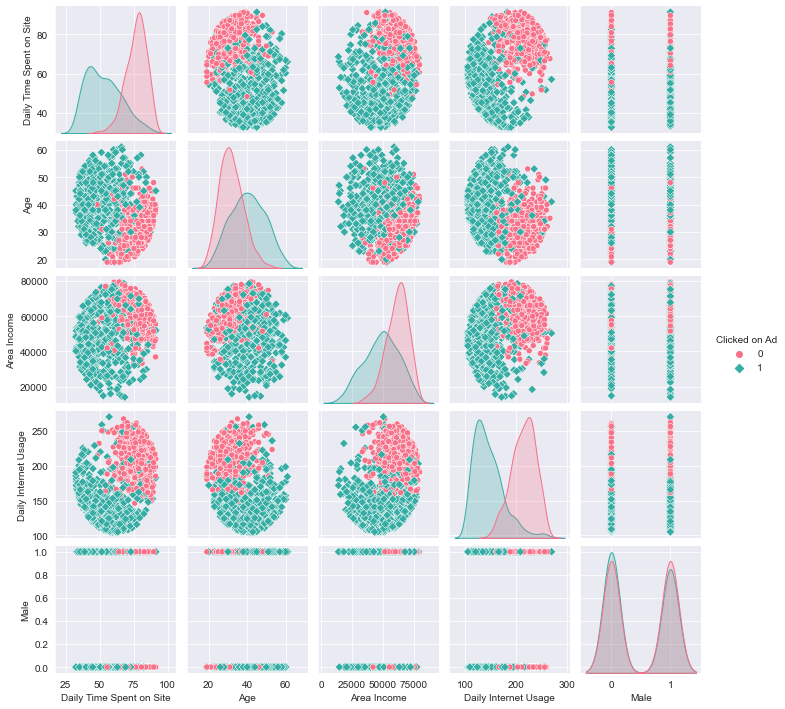

In [5]:
# Multiple pairwise bivariate distributions
sns.set_style("darkgrid")
sns.pairplot(df,hue = 'Clicked on Ad',diag_kind = "kde",kind = "scatter",palette = "husl", markers=["o", "D"], 
             height=2)
plt.show()

0    500
1    500
Name: Clicked on Ad, dtype: int64


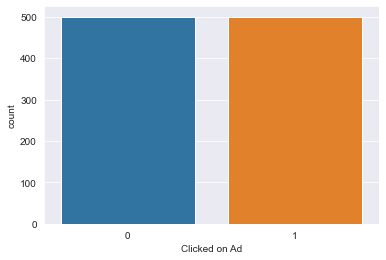

In [6]:
print(df['Clicked on Ad'].value_counts())
sns.countplot(x='Clicked on Ad', data = df)
plt.show()

In [7]:
df.groupby(['Male','Clicked on Ad'])['Clicked on Ad'].count().unstack()

Clicked on Ad,0,1
Male,,
0,250,269
1,250,231


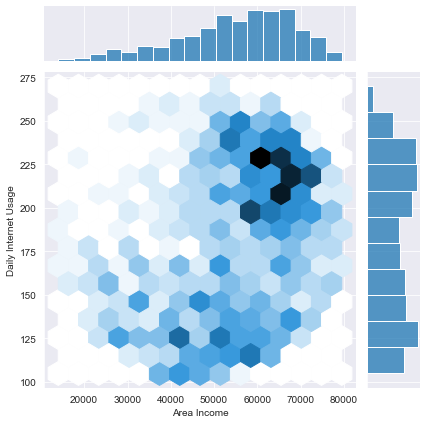

In [8]:
# Area income and Daily internet usage relation
sns.jointplot(x = "Area Income", y = "Daily Internet Usage", kind = "hex", data = df)
plt.show()

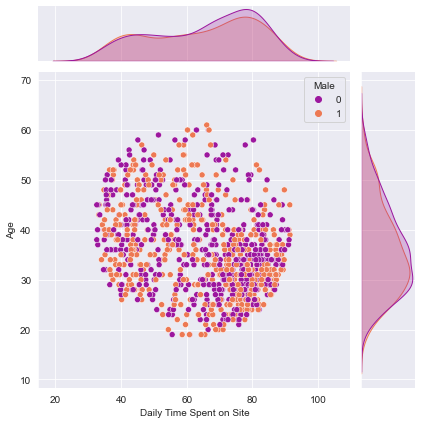

In [9]:
# Daily Time Spent on Site by different Age
sns.jointplot(x = 'Daily Time Spent on Site', y = 'Age', kind ='scatter', data = df, 
              markers =['o', 'v'], palette ='plasma', hue='Male')
plt.show()

In [18]:
df_final = df.corr()
df_final

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


## Inference from correlation table


<AxesSubplot:>

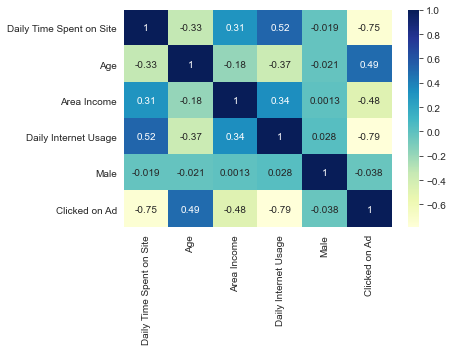

In [19]:
sns.heatmap(df_final, cmap = 'YlGnBu', annot=True)

## Inference from heat map

In [26]:
# Maximum number of internet users belong to which country
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
# STEPS TO DO THE TESTING:
# 1. X and Y values for test and train - SPLITTING THE DATASET
# 2. IMPLEMENTING MODELS - LOGISTIC, NAIVE BAYES and DECISION TREE
# 3. FIND ACCURACY OF ALL THE METHODS

### Splitting the data in X and Y using train_test_split

In [50]:
from sklearn.model_selection import train_test_split
X = df.drop(labels = ['Clicked on Ad','Ad Topic Line','Timestamp','City','Country'], axis =1) 
Y = df['Clicked on Ad']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , random_state=42)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Implementation of all 3 models

In [52]:
logR_model = LogisticRegression()
logR_model.fit(X_train, Y_train)
logRPred = logR_model.predict(X_test)
logR_model.score(X_test, Y_test) # score is different than accuracy_score

0.888

In [53]:
nb_model = GaussianNB()
# test the model
nb_model.fit(X_train, Y_train)
# predict the model
nbmodelPred = nb_model.predict(X_test)

In [54]:
decTree_model = DecisionTreeClassifier()
decTree_model.fit(X_train,Y_train)
decTreePred = decTree_model.predict(X_test)

### Calculating Accuracy of the above models

In [55]:
logRAccuracy = accuracy_score(logRPred, Y_test)
logRAccuracy

0.888

In [59]:
nbAccuracy = accuracy_score(nbmodelPred,Y_test)
nbAccuracy

0.952

In [60]:
decTreeAccuracy = accuracy_score(decTreePred, Y_test)
decTreeAccuracy

0.928

In [ ]:
##### From the above 3 methods, Naive Bayes Model has given the highest accuracy for the click on ads